In [ ]:
'''
  Read from <final_result.csv>:
    - the simulated feedback on ads
    - the persona owner's feedback on ads
'''

import pandas as pd
from sklearn.metrics import cohen_kappa_score

csv_file_path = 'final_result.csv'
df = pd.read_csv(csv_file_path)

simulated_feedback = df['Simulated Feedback'].tolist()
human_feedback = df["Persona Owner's feedback"].tolist()

# Convert to Python list:
print(f"simulated_feedback:\n{simulated_feedback}")
print(f"human_feedback:\n{human_feedback}")

'''
  Cohen’s kappa statistic is used to measure inter-rator agreement
  (NOT a classifier versus a ground truth).
  https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-s-kappa
'''
sf_1_hf_1 = sum((sf == 1 and hf == 1) for sf, hf in zip(simulated_feedback, human_feedback))
sf_0_hf_0 = sum((sf == 0 and hf == 0) for sf, hf in zip(simulated_feedback, human_feedback))
sf_1_hf_0 = sum((sf == 1 and hf == 0) for sf, hf in zip(simulated_feedback, human_feedback))
sf_0_hf_1 = sum((sf == 0 and hf == 1) for sf, hf in zip(simulated_feedback, human_feedback))
summary_matrix = pd.DataFrame({
    "Sim Rator 1": [sf_1_hf_1, sf_1_hf_0],
    "Sim Rator 0": [sf_0_hf_1, sf_0_hf_0]
}, index=["Human Rator 1", "Human Rator 0"])
print('\nSummary:')
print(summary_matrix)

'''
  Cohen’s kappa:
  a score that expresses the level of agreement
  between two annotators on a classification problem
'''

# Compute Cohen’s kappa:
c_k_score = cohen_kappa_score(simulated_feedback, human_feedback)
print(f"\nCohen's Kappa Score: {round(c_k_score, 4)}")


simulated_feedback:
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0]
human_feedback:
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

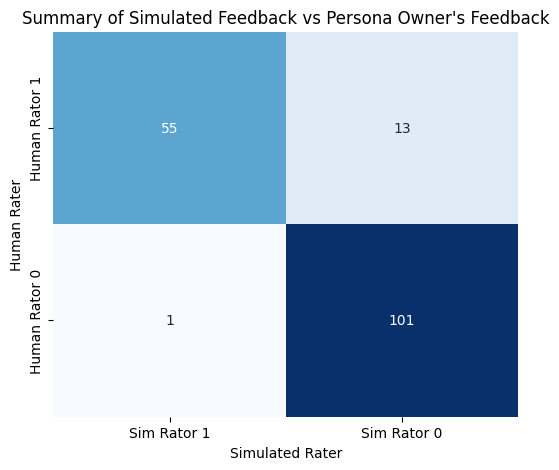

Cohen's Kappa Score: 0.8232


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the summary matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(summary_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Summary of Simulated Feedback vs Persona Owner's Feedback")
plt.ylabel("Human Rater")
plt.xlabel("Simulated Rater")
plt.show()

# Display the Cohen's Kappa Score with text
print(f"Cohen's Kappa Score: {round(c_k_score, 4)}")
